In [9]:
import torch
from src.cnn import CNN

cnn = CNN(29, 10)
cnn.load_state_dict(torch.load("../scripts/runs/Jul12_03-25-21_AP-T-020.local/model.pt"))
cnn.eval()

CNN(
  (embedding): Conv1d(29, 10, kernel_size=(1,), stride=(1,))
  (smoothing): Conv1d(10, 10, kernel_size=(13,), stride=(1,), padding=(6,))
  (bn): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (unembedding): Conv1d(10, 29, kernel_size=(1,), stride=(1,))
)

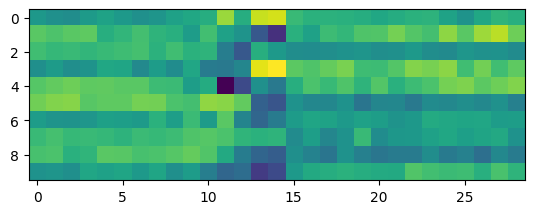

In [10]:
import matplotlib.pyplot as plt
plt.imshow(cnn.embedding.weight.data.squeeze())

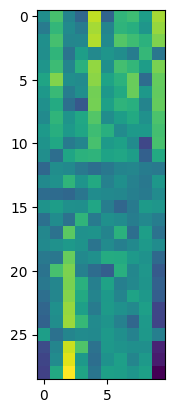

In [8]:
import matplotlib.pyplot as plt
plt.imshow(cnn.unembedding.weight.data.squeeze())

/Users/patrickmineault/Documents/unet-spikes/src/dataset.py:127: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rates = torch.tensor(rates)


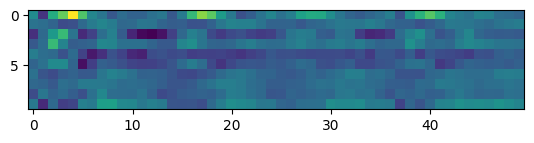

In [21]:
from src.dataset import SpikesDataset
dataset = SpikesDataset("../data/config/lorenz.yaml")

# First examplar
spikes, rates, _, _ = dataset[0]

# Run the spikes through part of the network
X = spikes.unsqueeze(0).to(torch.float32)
X = cnn.embedding(X)
X = cnn.smoothing(X)
plt.imshow(X.squeeze().detach().numpy())

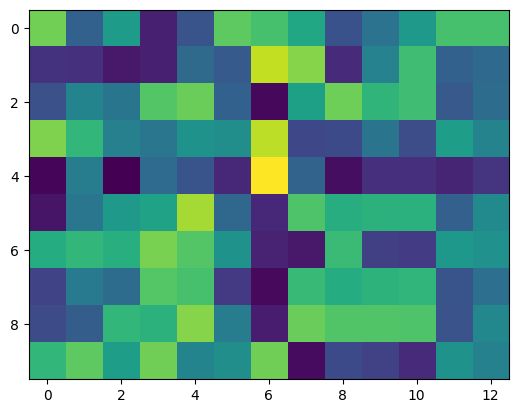

In [18]:
import matplotlib.pyplot as plt
plt.imshow(cnn.smoothing.weight.data[3, :, :].squeeze())